# Libraries

In [1]:
# The Libaries that are used

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange

# Import defaultdict to use dictionary, which will be used to record the number of crimes, the number of crimes for 
# each type of crimes, the number of liquor store, and the number of population in each LGA in Victoria
from collections import defaultdict as dd

# Import math library to use log function to calculate the Normalised Mutual Information (NMI)
import math

# Function to Correct Alphabetical 

In [2]:
# Correct the alphabetical name of the city (Example: from GREATER GEELONG to Greater Geelong)
def correct_alphabetical(city_name):
    
    prev_space_or_hyphen = False
    temp_name = ''
    
    #Iterate through the words
    for i in range(len(city_name)):
        
        # If the previous string is a space, it will keep the string as
        # upper case and reset the prev_space
        if prev_space_or_hyphen:
            temp_name+=city_name[i]
            prev_space_or_hyphen = False
        
        # The first string must be upper case
        elif i == 0:
            temp_name+=city_name[i]
        
        # The string is space, set the prev_space to True
        elif city_name[i] == ' ' or city_name[i] == '-':
            temp_name+=city_name[i]
            prev_space_or_hyphen = True
        
        # Other string will be converted to lower case
        else:
            temp_name += city_name[i].lower()
    
    return temp_name

# Function to Put the Data into a Dictionary

In [3]:
# Calculate the number of crimes or population and store the data in a dictionary
def calculate_into_dict(data, dict_data):
    for i in range(len(data)):
        if data[i][0] != 'Unincorporated Vic':
            dict_data[correct_alphabetical(data[i][0])] += data[i][1]
    
    return dict_data

# Calculate the Number of Crimes

In [4]:
# Open the csv file
crime = pd.read_csv('Crime_location.csv', encoding = 'ISO-8859-1', index_col = 'Jan - Dec reference period')

# Create a dictionary to store the data 
count_crime_2015 = dd(int)

# Slice the data to take only the LGA, and number of offences and convert them as an array

crime_2015 = crime.ix[[2015], ['Local Government Area', 'Offence Count', 'CSA Offence Division', ]]

# Calculate the number of crimes based on the LGA in 2015
count_crime_2015 = calculate_into_dict(crime_2015.values, count_crime_2015)

# Convert the dictionary to the array, so we can sort the data
list_crime_2015 = list(count_crime_2015.items())

# Sort the data based on the number of offences
list_crime_2015.sort(key = lambda x: x[1], reverse = True)

# Create a data frame
city_name_2015 = [list_crime_2015[i][0] for i in range(len(list_crime_2015))]
no_crimes_2015 = [list_crime_2015[i][1] for i in range(len(list_crime_2015))]
top_2015 = pd.DataFrame({'LGA Name': city_name_2015, 'Total Number of Crimes': no_crimes_2015})
top_2015.head(5)

,LGA Name,Total Number of Crimes
0,Melbourne,33542
1,Greater Geelong,21157
2,Casey,20902
3,Hume,20586
4,Greater Dandenong,19689


# Movement on the Crime Rates between 2012 and 2015

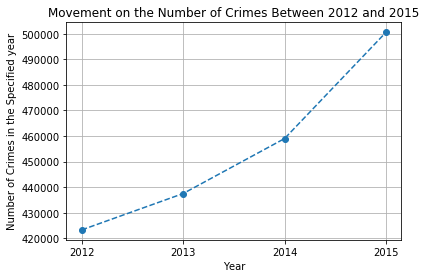

In [56]:
# Calculate the total offences in 2012, 2013, 2014, and 2015
offence_crime_2012 = sum(list(crime.ix[[2012], ['Offence Count']].values))[0]
offence_crime_2013 = sum(list(crime.ix[[2013], ['Offence Count']].values))[0]
offence_crime_2014 = sum(list(crime.ix[[2014], ['Offence Count']].values))[0]
offence_crime_2015 = sum(list(crime.ix[[2015], ['Offence Count']].values))[0]

crime_rates_2012_2015 = [offence_crime_2012, offence_crime_2013, offence_crime_2014, offence_crime_2015]
crime_year = [2012, 2013, 2014, 2015]

plt.plot(arange(len(crime_rates_2012_2015)),crime_rates_2012_2015, linestyle='--', marker='o')
plt.grid(True)
plt.title('Movement on the Number of Crimes Between 2012 and 2015')
plt.xlabel('Year')
plt.ylabel('Number of Crimes in the Specified year')
plt.xticks(arange(len(crime_year)),crime_year)
plt.show()

# Calculate the Number of Population in each LGA in Victoria

In [6]:
# Calculate the number of population in each LGA in Victoria to normalised the number of crimes

# Open the csv file
population = pd.read_csv('Population_by_LGA_2015.csv', encoding = 'ISO-8859-1', index_col = 'S/T name')
population_vic = population.ix[['Victoria'],['LGA name', 'Total Persons']]

# Create a dictionary to store the data
count_pop_2015 = dd(int)

# Calculate the number of crimes based on the LGA in 2015
count_pop_2015 = calculate_into_dict(population_vic.values, count_pop_2015)

# Normalised the Number of Crimes Data

In [7]:
# Calculate the average of the population data to replace the missing value with the average value
total_population_2015 = sum(list(count_pop_2015.values()))
average_population_2015 = total_population_2015/len(count_pop_2015)

# Create a dictionary to store the data
normalised_crime_2015 = dd(int)
for i in range(len(city_name_2015)):
    current_lga = city_name_2015[i]
    
    # Calculate the normalised by dividing the number of crimes with the number of population and multiple the
    # with 
    try:
        normalised_crime_2015[current_lga] = count_crime_2015[current_lga]/count_pop_2015[current_lga]*100000
        
    except ZeroDivisionError:
        
        # Detect if there is missing value on the population data
        print('The population data has missing value in LGA named '+current_lga+ ' and it is replaced with the average number of population.')
        
        # Normalised the data with the average value of the population if the number of population is missing
        normalised_crime_2015[current_lga] = count_crime_2015[current_lga]/average_population_2015

# Sort the data based on the number of offences
list_normalised = list(normalised_crime_2015.items())
list_normalised.sort(key = lambda x: x[1], reverse = True)
normalised_city = [list_normalised[i][0] for i in range(len(list_normalised))]
normalised_crime = [list_normalised[i][1] for i in range(len(list_normalised))]

The population data has missing value in LGA named Queenscliffe and it is replaced with the average number of population.


# Calculate the Number of Liquor Stores

In [8]:
# Function to calculate the number of liquor stores in each LGA and put the data in a dictionary
def calc_liquor_store(total_liquor_store, council_liquor, list_crime):
    
    # Iterate through the data
    for i in range(len(council_liquor)):
        
        # Correct the alphabetical for the council name and find the LGA name given the Council name
        council_name = correct_alphabetical(council_liquor[i][0])
        lga_name = find_LGA_name(council_name, list_crime)
        
        # Calculate the number of liquor store in that LGA
        total_liquor_store[lga_name] += 1
    
    # Return the dictionary
    return total_liquor_store

In [9]:
# Function to find the LGA name given the Council Name in liquor stores data
def find_LGA_name(council_name, list_crime):
    
    # Iterate through the LGA name on the list_crime
    for i in range(len(list_crime)):
        
        # If there is LGA name that contains in the council name, we have found the LGA name for the given
        # council name
        if list_crime[i][0] in council_name:
            return list_crime[i][0]

In [10]:
# Find the number of liquor stores in each LGA in 2016

# Open the csv file
liquor_metro_2015 = pd.read_csv('Liquor_Metro_2015.csv', encoding = 'ISO-8859-1')
liquor_region_2015 = pd.read_csv('Liquor_Region_2015.csv', encoding = 'ISO-8859-1')

# Create a dictionary to store the data
total_liquor_store_2015 = dd(int)

council_liquor_metro_2015 = liquor_metro_2015.ix[:, ['Council Name']].values
council_liquor_region_2015 = liquor_region_2015.ix[:, ['Council Name']].values

# Calculate the number of liquor stores in Metropolitan and Regional of Victoria
total_liquor_store_2015 = calc_liquor_store(total_liquor_store_2015, council_liquor_metro_2015, list_normalised)
total_liquor_store_2015 = calc_liquor_store(total_liquor_store_2015, council_liquor_region_2015, list_normalised)

# Find the number of liquor stores given the LGA names
liquor_store_crime= []
list_crime_liquor=[]
for i in range(len(normalised_city)):
    liquor_store_crime.append(total_liquor_store_2015[normalised_city[i]])
    list_crime_liquor.append([normalised_city[i], normalised_crime[i], total_liquor_store_2015[normalised_city[i]]])
    
# Create a Data Frame
crime_liquor_2015 = pd.DataFrame({'LGA Name': normalised_city, 'Total Number of Crimes per 100,000 people': 
                                  normalised_crime, 'Total Number of Liquor Stores': liquor_store_crime})

crime_liquor_2015.head(5)

,LGA Name,"Total Number of Crimes per 100,000 people",Total Number of Liquor Stores
0,Melbourne,26005.582261,2108
1,Latrobe,18117.419916,236
2,Horsham,15454.637403,101
3,Yarra,14723.334567,1469
4,Greater Dandenong,12890.617328,321


# Bar Chart of Top 5 LGAs with The Highest Crime Rates

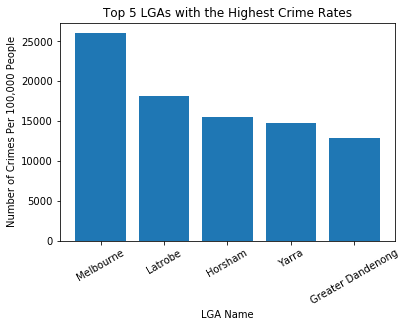

In [11]:
lga_top_5 = normalised_city[0:5]
crime_top_5 = normalised_crime[0:5]

plt.bar(arange(len(crime_top_5)),crime_top_5)
plt.title('Top 5 LGAs with the Highest Crime Rates')
plt.xlabel('LGA Name')
plt.ylabel('Number of Crimes Per 100,000 People')
plt.xticks( arange(len(lga_top_5)),lga_top_5, rotation=30)
plt.show()

# Bar Chart of Number of Liquor Stores in 5 LGAs with the Highest Crime Rates

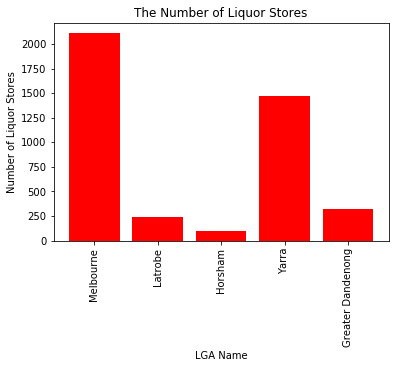

In [12]:
lga_top_5 = normalised_city[0:5]
liquor_top_5 = liquor_store_crime[0:5]

plt.bar(arange(len(liquor_top_5)),liquor_top_5, color='r')
plt.xticks(arange(len(lga_top_5)),lga_top_5, rotation=90)
plt.title('The Number of Liquor Stores')
plt.xlabel('LGA Name')
plt.ylabel('Number of Liquor Stores')

plt.show()

# Bar Chart of Top 5 LGAs with the Highest Crime Rates and the Number of Liquor Stores in those LGAs

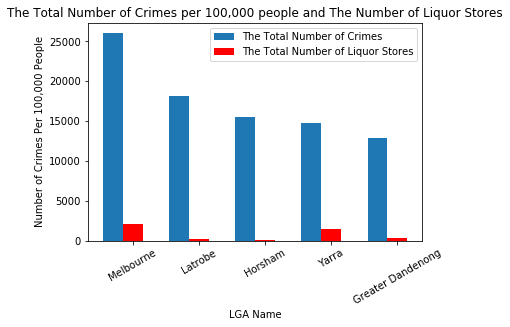

In [13]:
lga_top_5 = normalised_city[0:5]
crime_top_5 = normalised_crime[0:5]
liquor_top_5 = liquor_store_crime[0:5]

plt.bar(arange(len(crime_top_5))-0.3, crime_top_5, width=0.3)
plt.bar(arange(len(liquor_top_5)),liquor_top_5, width=0.3,color='r')
plt.xticks(arange(len(lga_top_5)),lga_top_5, rotation=30)
plt.title('The Total Number of Crimes per 100,000 people and The Number of Liquor Stores')
plt.legend(['The Total Number of Crimes', 'The Total Number of Liquor Stores'])
plt.xlabel('LGA Name')
plt.ylabel('Number of Crimes Per 100,000 People')

plt.show()

# Distribution of Liquor Stores in Victoria

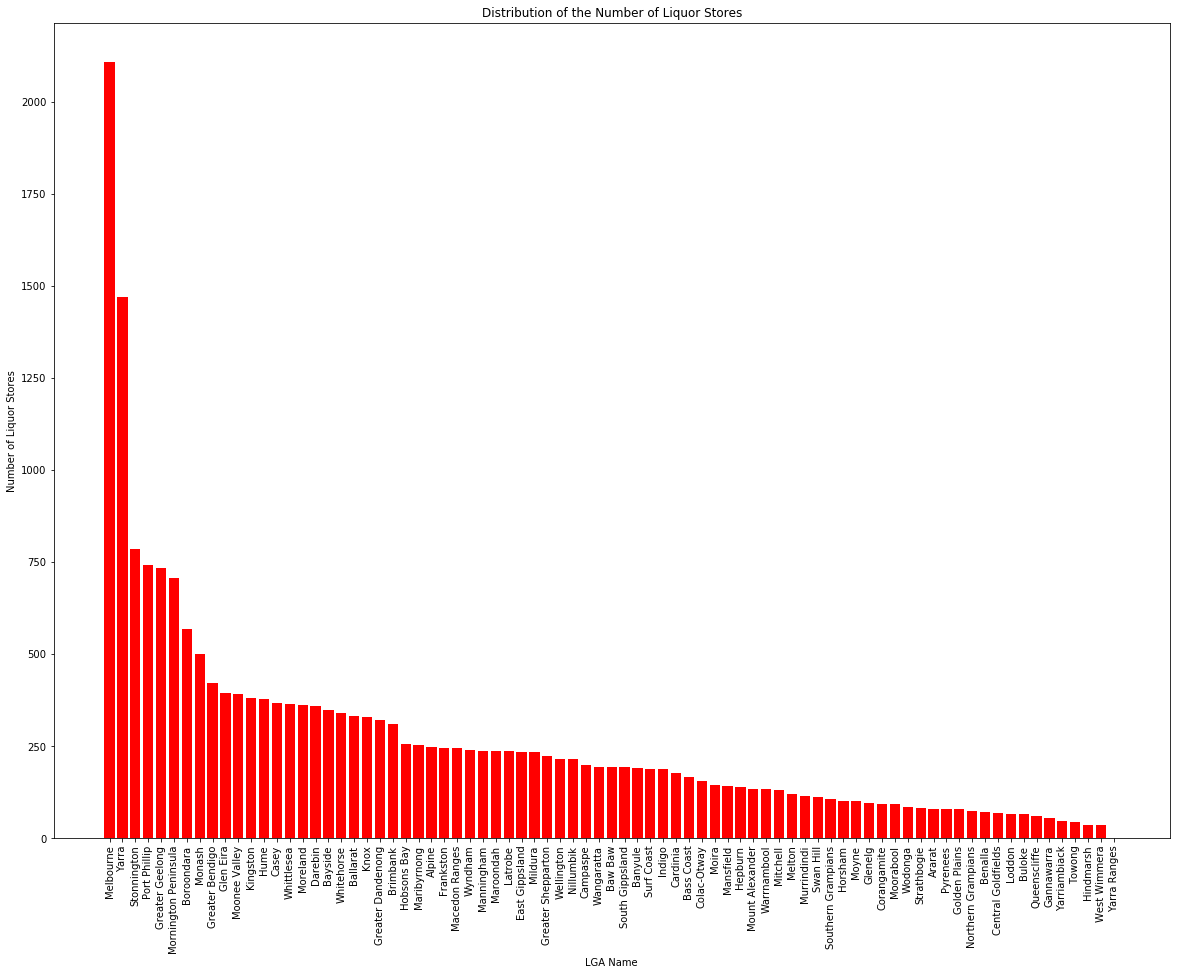

In [58]:
sorted_liquor_store_2015 = sorted(list(total_liquor_store_2015.items()), key = lambda x: x[1], reverse = True)
lga_distribution_liquor = [sorted_liquor_store_2015[i][0] for i in range(len(sorted_liquor_store_2015))]
distribution_liquor =[sorted_liquor_store_2015[i][1] for i in range(len(sorted_liquor_store_2015))]

plt.figure(figsize=(20,15))
plt.bar(arange(len(distribution_liquor)),distribution_liquor, color='r')
plt.xticks(arange(len(lga_distribution_liquor)),lga_distribution_liquor, rotation=90)
plt.title('Distribution of the Number of Liquor Stores')
plt.xlabel('LGA Name')
plt.ylabel('Number of Liquor Stores')

plt.show()

# Number of Crimes per 100,000 People in Each LGA Based on the Type of Crimes

In [15]:
# Function to calculate the number of crimes based on the type of crimes
def calc_type_crime(crime_2015, normalised_city, pop_2015, type_of_crime):
    
    # Calculate the average of the population data to replace the missing value with the average value
    total_population_2015 = sum(list(count_pop_2015.values()))
    average_population_2015 = total_population_2015/len(count_pop_2015)
    
    # Slice the type of crime from the Data Frame
    type_crime = crime_2015.loc[crime_2015['CSA Offence Division'] == type_of_crime].values
    
    # Create a dictionary to store the data
    specific_type_crime = dd(int)
        
    # Initialise the initial value to the dictionary
    for i in range(len(normalised_city)):
        specific_type_crime[normalised_city[i]] = 0
    
    # Iterate through the data
    for i in range(len(type_crime)):
        
        # Correct the alphabetical for the LGA name
        lga = correct_alphabetical(type_crime[i][0])
        
        # Normalised the data. However, if the population data in a LGA is 0, it will be divided with the
        # average population in Victoria
        try:
            specific_type_crime[lga] += type_crime[i][1]/count_pop_2015[lga]*100000
        except ZeroDivisionError:
            specific_type_crime[lga]+= type_crime[i][1]/average_population_2015
        
    return specific_type_crime

In [16]:
dict_crime_against_person = calc_type_crime(crime_2015, normalised_city, count_pop_2015, 'A Crimes against the person')
dict_property_offences = calc_type_crime(crime_2015, normalised_city, count_pop_2015, 
                                         'B Property and deception offences')
dict_drug_offences = calc_type_crime(crime_2015, normalised_city, count_pop_2015, 
                                     'C Drug offences')
dict_security_offences = calc_type_crime(crime_2015, normalised_city, count_pop_2015, 
                                         'D Public order and security offences')
dict_justice_offences = calc_type_crime(crime_2015, normalised_city, count_pop_2015, 
                                        'E Justice procedures offences')
dict_other_offences = calc_type_crime(crime_2015, normalised_city, count_pop_2015, 'F Other offences')

# Bar Chart of the Total Number of Crimes Based on the Type of Crimes

There were 105238 crimes against the person per 100,000 people in Victoria in 2015
There were 335416 property and deception offences per 100,000 people in Victoria in 2015
There were 39077 drug offences per 100,000 people in Victoria in 2015
There were 52963 public order and security offences  per 100,000 people in Victoria in 2015
There were 83964 justice procedures offences  per 100,000 people in Victoria in 2015
There were 3014 other offences  per 100,000 people in Victoria in 2015


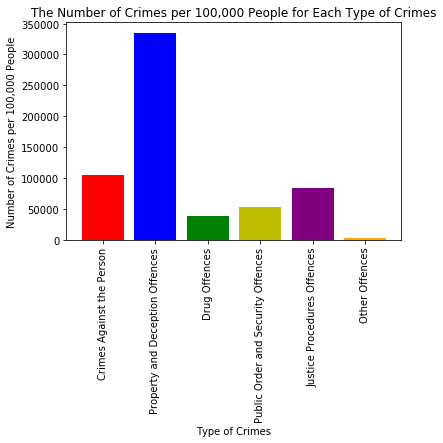

In [71]:
# Sum up the number of crimes per 100,000 people for each type of crimes and print it
total_crime_person = sum(list(dict_crime_against_person.values()))
print("There were {:.0f} crimes against the person per 100,000 people in Victoria in 2015".format(total_crime_person))

total_property_offences = sum(list(dict_property_offences.values()))
print("There were {:.0f} property and deception offences per 100,000 people in Victoria in 2015".
      format(total_property_offences))

total_drug_offences = sum(list(dict_drug_offences.values()))
print("There were {:.0f} drug offences per 100,000 people in Victoria in 2015".format(total_drug_offences))

total_security_offences = sum(list(dict_security_offences.values()))
print("There were {:.0f} public order and security offences  per 100,000 people in Victoria in 2015".
      format(total_security_offences))

total_justice_offences = sum(list(dict_justice_offences.values()))
print("There were {:.0f} justice procedures offences  per 100,000 people in Victoria in 2015".
      format(total_justice_offences))

total_other_offences = sum(list(dict_other_offences.values()))
print("There were {:.0f} other offences  per 100,000 people in Victoria in 2015".format(total_other_offences))


# Insert the total crimes for each type of crimes into an array
total_based_type_crime = [total_crime_person, total_property_offences, total_drug_offences, total_security_offences,
                         total_justice_offences, total_other_offences]

# Create an array to use it as the x-label
all_type_crimes = ['Crimes Against the Person', 'Property and Deception Offences', 'Drug Offences',
                  'Public Order and Security Offences', 'Justice Procedures Offences', 'Other Offences']

# Set the color for the plot
colormap = np.array(['r', 'b', 'g', 'y', 'purple', 'orange'])

# Plot the bar graph
plt.bar(arange(len(total_based_type_crime)), total_based_type_crime, color=colormap)
plt.xticks(arange(len(all_type_crimes)),all_type_crimes, rotation=90)
plt.title('The Number of Crimes per 100,000 People for Each Type of Crimes')
plt.xlabel('Type of Crimes')
plt.ylabel('Number of Crimes per 100,000 People')

plt.show()


# Calculate Pearson Correlation

In [18]:
# Calculate the Pearson's Correlation

# Function to find the average of the data
def calc_aver(dict_data):
    total_data = 0
    sum_data = 0
    
    for key, values in dict_data.items():
        total_data += 1
        sum_data += values
    
    return sum_data/total_data

def pearson_correl(data1, data2):
    aver_data1 = calc_aver(data1)
    aver_data2 = calc_aver(data2)
    
    # Initialise the parameters, which are the covariance, the standard deviation for data 1 and the standarad
    # deviation for data 2
    covariance = 0
    stand_devi_data1 = 0
    stand_devi_data2 = 0
    
    for key, value in data1.items():
        curr_value_data1 = value-aver_data1
        curr_value_data2 = data2[key]-aver_data2
       
        covariance += (curr_value_data1)*(curr_value_data2)
        stand_devi_data1 += (curr_value_data1)**2
        stand_devi_data2 += (curr_value_data2)**2
    
    pearson_value = covariance/(((stand_devi_data1)**0.5)*((stand_devi_data2)**0.5))
    
    return pearson_value
    

# Calculate Normalised Mutual Information

In [19]:
# Calculate the Normalised Mutual Information
def normalised_mutual_information(list_crime_liquor, bins_crime, bins_liquor):
    list_bin_class = []
    # Calculate the total bins
    total_crime_bin = len(bins_crime)-1
    total_liquor_bin = len(bins_liquor)-1
    for i in range(len(list_crime_liquor)):
        
        # Find the bin class both for the value of crime and the value of liquor
        bin_crime_class, bin_liquor_class = find_group_bin(list_crime_liquor[i][1], list_crime_liquor[i][2], 
                                                          bins_crime, bins_liquor)
        list_bin_class.append([bins_crime[bin_crime_class], bins_liquor[bin_liquor_class]])
    
    # Calculate the mutual information, entropy of the crime and the liquor data
    mutual_info, entropy_crime, entropy_liquor = calculate_mutual_info(list_bin_class, bins_crime, bins_liquor)
    
    # Calculate the Normalised Mutual Information by dividing the Mutual information with the smallest entropy
    try :
        if (entropy_crime < entropy_liquor):
            normalised_mutual_info = mutual_info/entropy_crime
        else:
            normalised_mutual_info = mutual_info/entropy_liquor
            
    # If one of the entropies is zero, it will return the NMI as 0.0
    except ZeroDivisionError:
        normalised_mutual_info = 0.0
    
    return normalised_mutual_info

In [20]:
# Determine the bin groups for the number of crime and the number of liquor that are inputted
def find_group_bin(value_crime, value_liquor, bins_crime, bins_liquor):
    
    # Set the initial bin class
    bin_crime_class = 0
    bin_liquor_class = 0
    
    # Iterate through the bins range
    for i in range(len(bins_crime)-1):
        
        # Find the bin class for the value of crime
        if bins_crime[i] <= value_crime < bins_crime[i+1]:
            bin_crime_class = i
    
    # Iterate through the bins range
    for i in range(len(bins_liquor)-1):
        
        # Find the bin class for the value of crime
        if bins_liquor[i] <= value_liquor < bins_liquor[i+1]:
            bin_liquor_class = i
    
    return bin_crime_class, bin_liquor_class

In [21]:
# Function to calculate the entropy
def calc_entropy(list_bin_class, bins, index_used):
    total_outcome = len(list_bin_class)
    entropy = 0
    for i in range(len(bins)-1):
        curr_bin = bins[i]
        
        # Insert the data that has the same bin class as curr_bin_crime and calculate how many of them
        temp_class = [list_bin_class[j][index_used] for j in range(len(list_bin_class)) 
                            if list_bin_class[j][index_used] == curr_bin]
        
        temp_tot_class = len(temp_class)
        
        if (temp_tot_class != 0):
            # Calculate the entropy
            entropy -= (temp_tot_class*math.log(temp_tot_class/total_outcome))/(total_outcome*math.log(2))
    
    return entropy

In [22]:
# Function to calculate the mutual information
def calculate_mutual_info(list_bin_class, bins_crime, bins_liquor):
    total_outcome_crime = len(list_bin_class)
    conditional_entropy = 0
    
    # Iterate through the bin class of the crime
    for i in range(len(bins_crime)-1):
        
        curr_bin_crime = bins_crime[i]
        
        # Insert the data that has the same bin class as curr_bin_crime and calculate how many of them
        temp_class_crime = [list_bin_class[j][1] for j in range(len(list_bin_class)) if list_bin_class[j][0] == 
                              curr_bin_crime]
        
        # Calculate the number of data that is in this class
        temp_tot_class = len(temp_class_crime)
        curr_entropy = 0
        if (temp_tot_class != 0):
            temp_total = len(temp_class_crime)
            
        
            # Iterate through the bin class of the liquor
            for k in range(len(bins_liquor)-1):
                curr_bin_liquor = bins_liquor[k]
                
                # Insert the data that has the same bin class as curr_bin_crime and bin class curr_bin_liquor
                # and calculate how many of them
                temp_class_liquor = len([temp_class_crime[j] for j in range(len(temp_class_crime)) 
                                     if temp_class_crime[j] == curr_bin_liquor])
                
                if (temp_tot_class != 0 and temp_total != 0 and temp_class_liquor != 0):
                    
                    curr_entropy -= (temp_class_liquor*math.log(temp_class_liquor/temp_total))/(temp_total*
                                                                                                   math.log(2))
        
        # Calculate the conditional entropy
        conditional_entropy += (temp_tot_class/total_outcome_crime)*curr_entropy
    
    # Calculate the entropy for the crime and the liquor data
    entropy_crime = calc_entropy(list_bin_class, bins_crime, 0)
    entropy_liquor = calc_entropy(list_bin_class, bins_liquor, 1)
    
    # Calculate the mutual information (H(liquor) - H(liquor|crime))
    mutual_info = entropy_liquor-conditional_entropy
    
    return mutual_info, entropy_crime, entropy_liquor

# Merge the Data into a Single List

In [23]:
def create_list_crime_liquor(crime_dict, liquor_dict):
    list_lga = list(crime_dict.keys())
    list_lga_crime_liquor = []
    for i in range(len(crime_dict)):
        temp_list = []
        curr_lga = list_lga[i]
        temp_list.append(curr_lga)
        temp_list.append(crime_dict[curr_lga])
        temp_list.append(liquor_dict[curr_lga])
        list_lga_crime_liquor.append(temp_list)
    return list_lga_crime_liquor

# Find 3 Bins Equal Length Discretisation

In [24]:
# Function to give the bin class using the bins equal length discreatisation give the number of crimes or liquor stores
def bin_equal_length_discretisation(list_data):
    max_data = max(list_data)
    min_data = min(list_data)
    average = (max_data-min_data)/3
    list_bin = [min_data, min_data+average, min_data+2*average, max_data+1]
    
    return list_bin

# Data with Outliers

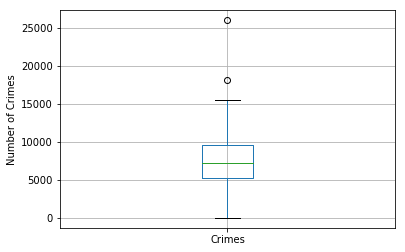

In [25]:
df_liquor_crime = pd.DataFrame({'Liquor Stores': liquor_store_crime, 'Crimes': normalised_crime})
df_crime = df_liquor_crime.ix[:,['Crimes']].boxplot()
plt.ylabel('Number of Crimes')
plt.show()

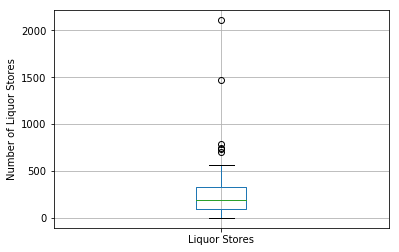

In [26]:
df_liquor = df_liquor_crime.ix[:,['Liquor Stores']].boxplot()
plt.ylabel('Number of Liquor Stores')
plt.show()

The Pearson Correlation is 0.5676355050860961
The Normalised Mutual Information is 0.23189224924751617


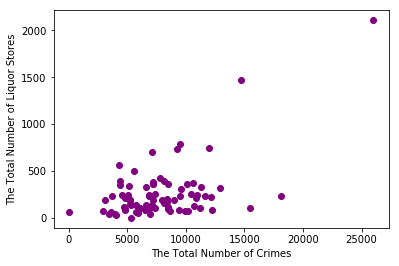

In [27]:
# Determine the bins
bins_crime = bin_equal_length_discretisation(normalised_crime)
bins_liquor = bin_equal_length_discretisation(liquor_store_crime)

# Create the Scatter Plot
plt.scatter(normalised_crime,liquor_store_crime, color='purple')
plt.xlabel("The Total Number of Crimes")
plt.ylabel("The Total Number of Liquor Stores")

# Calculate the Pearson Correlation
pearson_correl_value = pearson_correl(normalised_crime_2015, total_liquor_store_2015)
print("The Pearson Correlation is", pearson_correl_value)

# Calculate the Normalised Mutual Information
unclean_normalised_mutual_info = normalised_mutual_information(list_crime_liquor, bins_crime, bins_liquor)
print('The Normalised Mutual Information is', unclean_normalised_mutual_info)

# Data without Outliers

In [28]:
# Function to clean the outliers
def clean_outliers(dict_data, type_dict, list_outliers):
    clean_dict = dd(type_dict)
    
    for key,values in dict_data.items():
        if key not in list_outliers:
            clean_dict[key] = values
            
    return clean_dict

In [1]:
list_outliers = ['Melbourne', 'Latrobe', 'Yarra', 'Stonnington', 'Port Phillip', 'Greater Geelong', 'Casey', 'Hume',
                'Greater Dandenong', 'Darebin', 'Brimbank', 'Mornington Peninsula', 'Boroondara', 'Monash', 
                'Queenscliffe', 'Horsham']
print(sorted(list_outliers))

['Boroondara', 'Brimbank', 'Casey', 'Darebin', 'Greater Dandenong', 'Greater Geelong', 'Horsham', 'Hume', 'Latrobe', 'Melbourne', 'Monash', 'Mornington Peninsula', 'Port Phillip', 'Queenscliffe', 'Stonnington', 'Yarra']


In [30]:
# Clean the Data
clean_count_crime_2015 = clean_outliers(normalised_crime_2015, int, list_outliers)
clean_total_liquor_store_2015 = clean_outliers(total_liquor_store_2015, int, list_outliers)

# Insert the data into an array
list_clean = create_list_crime_liquor(clean_count_crime_2015, clean_total_liquor_store_2015)
list_clean_count_crime_2015 = [list_clean[i][1] for i in range(len(list_clean))]
list_clean_total_liquor_store = [list_clean[i][2] for i in range(len(list_clean))]

# Determine the bins
bins_clean_crime = bin_equal_length_discretisation(list_clean_count_crime_2015)
bins_clean_liquor = bin_equal_length_discretisation(list_clean_total_liquor_store)

The Pearson Correlation is 0.12761148528142094
The Normalised Mutual Information is 0.016864138963566193


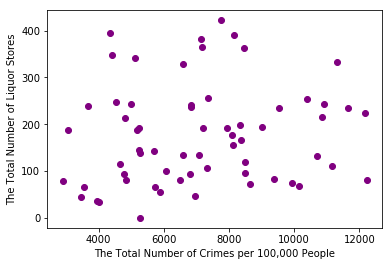

In [31]:
# Create the Scatter plot
plt.scatter(list_clean_count_crime_2015, list_clean_total_liquor_store, color='purple')
plt.xlabel("The Total Number of Crimes per 100,000 People")
plt.ylabel("The Total Number of Liquor Stores")

# Calculate the Pearson Correlation
clean_pearson = pearson_correl(clean_count_crime_2015, clean_total_liquor_store_2015)
print("The Pearson Correlation is", clean_pearson)

# Calculate the Normalised Mutual Information
clean_normalised_mutual_info = normalised_mutual_information(list_clean, bins_clean_crime, bins_clean_liquor)
print('The Normalised Mutual Information is', clean_normalised_mutual_info)

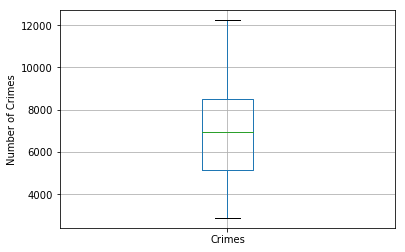

In [32]:
df_crime_clean = pd.DataFrame({'Crimes': list_clean_count_crime_2015}).boxplot()
plt.ylabel('Number of Crimes')
plt.show()

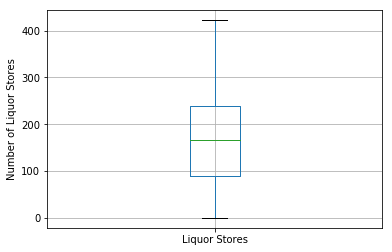

In [33]:
df_liquor_clean = pd.DataFrame({'Liquor Stores': list_clean_total_liquor_store}).boxplot()
plt.ylabel('Number of Liquor Stores')
plt.show()

# Crimes Against the Person with Outliers

The Pearson Correlation is 0.06924273949951722
The Normalised Mutual Information is 0.10421812754531451


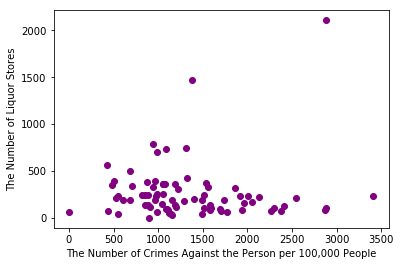

In [34]:
# Scatter plot the number of Crimes Against Person and the number of Liquor Stores

# Insert the data into an array
list_person = list(dict_crime_against_person.values())

# Determine the bins
bins_person = bin_equal_length_discretisation(list_person)
bins_liquor = bin_equal_length_discretisation(liquor_store_crime)

plt.scatter(list_person,liquor_store_crime, color='purple')
plt.xlabel("The Number of Crimes Against the Person per 100,000 People")
plt.ylabel("The Number of Liquor Stores")

# Calculate the Pearson Correlation
pearson_crime_against_person = pearson_correl(dict_crime_against_person, total_liquor_store_2015)
print("The Pearson Correlation is",pearson_crime_against_person)

# Calculate the Normalised Mutual Information
list_person_liquor = create_list_crime_liquor(dict_crime_against_person, total_liquor_store_2015)
normalised_mutual_info_person = normalised_mutual_information(list_person_liquor, bins_person, bins_liquor)
print('The Normalised Mutual Information is', normalised_mutual_info_person)

# Crime Against the Person without Outliers

In [35]:
# Clean the data
clean_person = clean_outliers(dict_crime_against_person, int, list_outliers)
list_clean_person = list(clean_person.values())
list_clean_person_liquor = create_list_crime_liquor(clean_person, total_liquor_store_2015)

# Determine the bins
bins_clean_person = bin_equal_length_discretisation(list_clean_person)
bins_clean_liquor = bin_equal_length_discretisation(list_clean_total_liquor_store)

The Pearson Correlation is -0.2757300465193689
The Normalised Mutual Information is 0.044023670541834606


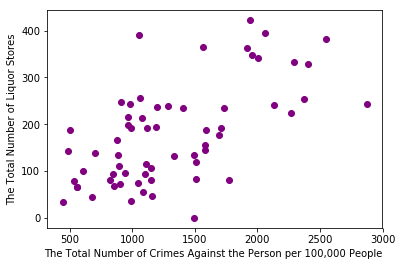

In [36]:
# Create the Scatter plot
plt.scatter(list_clean_person, list_clean_total_liquor_store, color='purple')
plt.xlabel("The Total Number of Crimes Against the Person per 100,000 People ")
plt.ylabel("The Total Number of Liquor Stores")

# Calculate the Pearson Correlation
clean_pearson_crime_against_person = pearson_correl(clean_person, clean_total_liquor_store_2015)
print("The Pearson Correlation is", clean_pearson_crime_against_person)

# Calculate the Normalised Mutual Information
clean_normalised_mutual_info_person = normalised_mutual_information(list_clean_person_liquor, bins_clean_person, 
                                                                    bins_clean_liquor)
print('The Normalised Mutual Information is', clean_normalised_mutual_info_person)

# Property and Deception Offences with Outliers

The Pearson Correlation is 0.7484217406267023
The Normalised Mutual Information is 0.3265830510701691


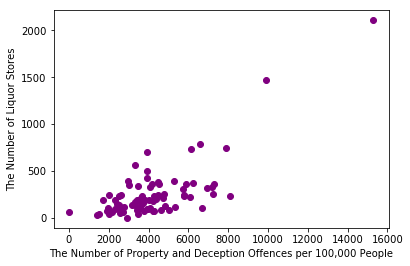

In [37]:
# Scatter plots between the Number of Property and Deception Offences and the Number of Liquor Stores

# Insert the data into an array
list_property = list(dict_property_offences.values())

# Determine the bins
bins_property = bin_equal_length_discretisation(list_property)
bins_liquor = bin_equal_length_discretisation(liquor_store_crime)

plt.scatter(list_property,liquor_store_crime,color='purple')
plt.xlabel("The Number of Property and Deception Offences per 100,000 People")
plt.ylabel("The Number of Liquor Stores")

# Calculate the Pearson Correlation
pearson_property_offences = pearson_correl(dict_property_offences, total_liquor_store_2015)
print("The Pearson Correlation is",pearson_property_offences)

# Calculate the Normalised Mutual Information
list_property_liquor = create_list_crime_liquor(dict_property_offences, total_liquor_store_2015)
normalised_mutual_info_property = normalised_mutual_information(list_property_liquor, bins_property, bins_liquor)
print('The Normalised Mutual Information is', normalised_mutual_info_property)

# Property and Deception Offences without Outliers

In [38]:
# Clean the data
clean_property = clean_outliers(dict_property_offences, int, list_outliers)
list_clean_property = list(clean_property.values())
list_clean_property_liquor = create_list_crime_liquor(clean_property, total_liquor_store_2015)

# Determine the bins
bins_clean_property = bin_equal_length_discretisation(list_clean_property)
bins_clean_liquor = bin_equal_length_discretisation(list_clean_total_liquor_store)

The Pearson Correlation is 0.42374383223085554
The Normalised Mutual Information is 0.04581829069892393


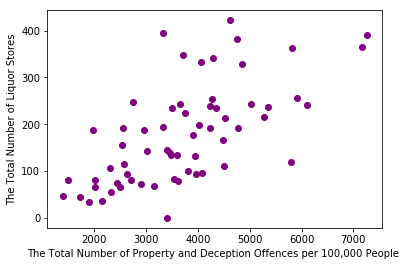

In [39]:
# Create the Scatter plot
plt.scatter(list_clean_property, list_clean_total_liquor_store, color='purple')
plt.xlabel("The Total Number of Property and Deception Offences per 100,000 People ")
plt.ylabel("The Total Number of Liquor Stores")

# Calculate the Pearson Correlation
clean_pearson_property_offences = pearson_correl(clean_property, clean_total_liquor_store_2015)
print("The Pearson Correlation is", clean_pearson_property_offences)

# Calculate the Normalised Mutual Information
clean_normalised_mutual_info_property = normalised_mutual_information(list_clean_property_liquor, 
                                                                      bins_clean_property, bins_clean_liquor)
print('The Normalised Mutual Information is', clean_normalised_mutual_info_property)

# Drug Offences with Outliers

The Pearson Correlation is 0.4526247853733682
The Normalised Mutual Information is 0.2777133108499012


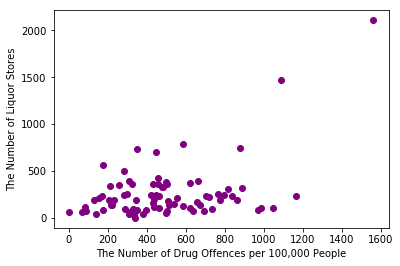

In [40]:
# Scatter plots between the Number of Drug Offences and the Number of Liquor Stores

# Insert the data into an array
list_drug = list(dict_drug_offences.values())

# Determine the bins
bins_drug = bin_equal_length_discretisation(list_drug)
bins_liquor = bin_equal_length_discretisation(liquor_store_crime)

plt.scatter(list_drug,liquor_store_crime, color='purple')
plt.xlabel("The Number of Drug Offences per 100,000 People")
plt.ylabel("The Number of Liquor Stores")

# Calculate the Pearson Correlation
pearson_drug_offences = pearson_correl(dict_drug_offences, total_liquor_store_2015)
print("The Pearson Correlation is",pearson_drug_offences)

# Calculate the Normalised Mutual Information
list_drug_liquor = create_list_crime_liquor(dict_drug_offences, total_liquor_store_2015)
normalised_mutual_info_drug = normalised_mutual_information(list_drug_liquor, bins_drug, bins_liquor)
print('The Normalised Mutual Information is', normalised_mutual_info_drug)

# Drug Offences without Outliers

In [41]:
# Clean the data
clean_drug = clean_outliers(dict_drug_offences, int, list_outliers)
list_clean_drug = list(clean_property.values())
list_clean_drug_liquor = create_list_crime_liquor(clean_drug, total_liquor_store_2015)

# Determine the bins
bins_clean_drug = bin_equal_length_discretisation(list_clean_drug)
bins_clean_liquor = bin_equal_length_discretisation(list_clean_total_liquor_store)

The Pearson Correlation is 0.05915635102001603
The Normalised Mutual Information is 0.0


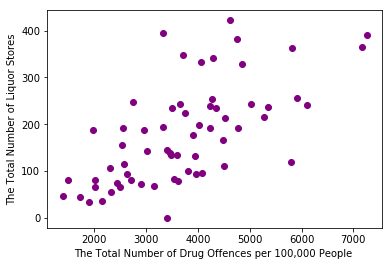

In [42]:
# Create the Scatter plot
plt.scatter(list_clean_drug, list_clean_total_liquor_store, color='purple')
plt.xlabel("The Total Number of Drug Offences per 100,000 People ")
plt.ylabel("The Total Number of Liquor Stores")

# Calculate the Pearson Correlation
clean_pearson_drug_offences = pearson_correl(clean_drug, clean_total_liquor_store_2015)
print("The Pearson Correlation is", clean_pearson_drug_offences)

# Calculate the Mutual Information
clean_normalised_mutual_info_drug = normalised_mutual_information(list_clean_drug_liquor, bins_clean_drug, 
                                                                  bins_clean_liquor)
print('The Normalised Mutual Information is', clean_normalised_mutual_info_drug)

# Public Order and Security Offences with Outliers

The Pearson Correlation is 0.48338157378118474
The Normalised Mutual Information is 0.26501072873339837


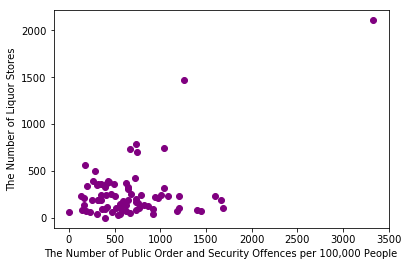

In [43]:
# Scatter plots between the Number of Public Order and Security Offences and the Number of Liquor Stores

# Insert the data into an array
list_security = list(dict_security_offences.values())

# Determine the bins
bins_security = bin_equal_length_discretisation(list_security)
bins_liquor = bin_equal_length_discretisation(liquor_store_crime)

list_security_liquor = create_list_crime_liquor(dict_security_offences, total_liquor_store_2015)

plt.scatter(list_security,liquor_store_crime, color='purple')
plt.xlabel("The Number of Public Order and Security Offences per 100,000 People")
plt.ylabel("The Number of Liquor Stores")

# Calculate the Pearson Correlation
pearson_security_offences = pearson_correl(dict_security_offences, total_liquor_store_2015)
print("The Pearson Correlation is",pearson_security_offences)

# Calculate the Normalised Mutual Information
normalised_mutual_info_security = normalised_mutual_information(list_security_liquor, bins_security, bins_liquor)
print('The Normalised Mutual Information is', normalised_mutual_info_security)

# Public Order and Security Offences without Outliers

In [44]:
# Clean the data
clean_security = clean_outliers(dict_security_offences, int, list_outliers)
list_clean_security = list(clean_security.values())
list_clean_security_liquor = create_list_crime_liquor(clean_security, total_liquor_store_2015)

# Determine the bins
bins_clean_security = bin_equal_length_discretisation(list_clean_security)
bins_clean_liquor = bin_equal_length_discretisation(list_clean_total_liquor_store)

The Pearson Correlation is -0.17845490464545002
The Normalised Mutual Information is 0.06602707423432458


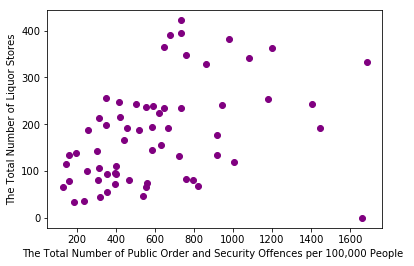

In [45]:
# Create the Scatter plot
plt.scatter(list_clean_security, list_clean_total_liquor_store, color='purple')
plt.xlabel("The Total Number of Public Order and Security Offences per 100,000 People ")
plt.ylabel("The Total Number of Liquor Stores")

# Calculate the Pearson Correlation
clean_pearson_security_offences = pearson_correl(clean_security, clean_total_liquor_store_2015)
print("The Pearson Correlation is", clean_pearson_security_offences)

# Calculate the Normalised Mutual Information
clean_normalised_mutual_info_security = normalised_mutual_information(list_clean_security_liquor, 
                                                                      bins_clean_security, bins_clean_liquor)
print('The Normalised Mutual Information is', clean_normalised_mutual_info_security)

# Justice Procedures Offences with Outliers

The Pearson Correlation is 0.14553575517085182
The Normalised Mutual Information is 0.15891587859718803


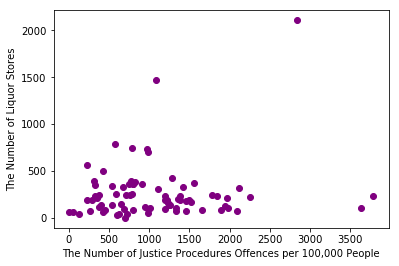

In [46]:
# Scatter plots between the Number of Justice Offences and the Number of Liquor Stores

# Insert the data into an array
list_justice = list(dict_justice_offences.values())

# Determine the bins
bins_justice = bin_equal_length_discretisation(list_justice)
bins_liquor = bin_equal_length_discretisation(liquor_store_crime)

plt.scatter(list_justice,liquor_store_crime, color='purple')
plt.xlabel("The Number of Justice Procedures Offences per 100,000 People")
plt.ylabel("The Number of Liquor Stores")

# Calculate the Pearson Correlation
pearson_justice_offences = pearson_correl(dict_justice_offences, total_liquor_store_2015)
print("The Pearson Correlation is",pearson_justice_offences)

# Calculate the Normalised Mutual Information
list_justice_liquor = create_list_crime_liquor(dict_justice_offences, total_liquor_store_2015)
normalised_mutual_info_justice = normalised_mutual_information(list_justice_liquor, bins_justice, bins_liquor)
print('The Normalised Mutual Information is', normalised_mutual_info_justice)

# Justice Procedures Offences without Outliers

In [47]:
# Clean the data
clean_justice = clean_outliers(dict_justice_offences, int, list_outliers)
list_clean_justice = list(clean_justice.values())
list_clean_justice_liquor = create_list_crime_liquor(clean_justice, total_liquor_store_2015)

# Determine the bins
bins_clean_justice = bin_equal_length_discretisation(list_clean_property)
bins_clean_liquor = bin_equal_length_discretisation(list_clean_total_liquor_store)

The Pearson Correlation is -0.040983296174376224
The Normalised Mutual Information is 0.0


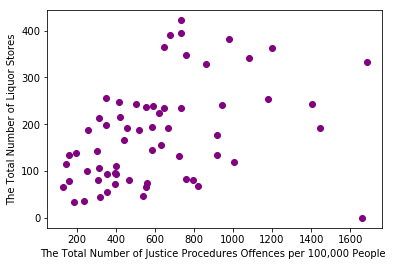

In [48]:
# Create the Scatter plot
plt.scatter(list_clean_security, list_clean_total_liquor_store, color='purple')
plt.xlabel("The Total Number of Justice Procedures Offences per 100,000 People ")
plt.ylabel("The Total Number of Liquor Stores")

# Calculate the Pearson Correlation
clean_pearson_justice_offences = pearson_correl(clean_justice, clean_total_liquor_store_2015)
print("The Pearson Correlation is", clean_pearson_justice_offences)

# Calculate the Normalised Mutual Information
clean_normalised_mutual_info_justice = normalised_mutual_information(list_clean_justice_liquor, 
                                                                     bins_clean_justice, bins_clean_liquor)
print('The Normalised Mutual Information is', clean_normalised_mutual_info_justice)

# Other Offences with Outliers

The Pearson Correlation is 0.004842806966395148
The Normalised Mutual Information is 0.06377112509524051


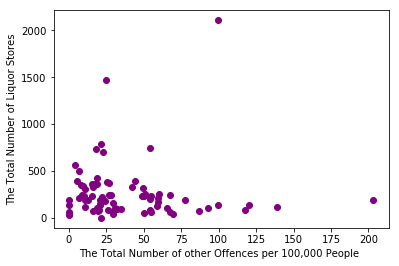

In [49]:
# Scatter plots between the Number of Other Offences and the Number of Liquor Stores

# Insert the data into an array
list_other = list(dict_other_offences.values())

# Determine the bins
bins_other = bin_equal_length_discretisation(list_other)
bins_liquor = bin_equal_length_discretisation(liquor_store_crime)

plt.scatter(list_other,liquor_store_crime, color='purple')
plt.xlabel("The Total Number of other Offences per 100,000 People ")
plt.ylabel("The Total Number of Liquor Stores")

# Calculate the Pearson Correlation
pearson_other_offences = pearson_correl(dict_other_offences, total_liquor_store_2015)
print("The Pearson Correlation is",pearson_other_offences)

# Calculate the Mutual Information
list_other_liquor = create_list_crime_liquor(dict_other_offences, total_liquor_store_2015)
normalised_mutual_info_other = normalised_mutual_information(list_other_liquor, bins_other, bins_liquor)
print('The Normalised Mutual Information is', normalised_mutual_info_other)

# Other Offences without Outliers

In [50]:
# Clean the data
clean_other = clean_outliers(dict_other_offences, int, list_outliers)
list_clean_other = list(clean_other.values())
list_clean_other_liquor = create_list_crime_liquor(clean_other, total_liquor_store_2015)

# Determine the bins
bins_clean_other = bin_equal_length_discretisation(list_clean_other)
bins_clean_liquor = bin_equal_length_discretisation(list_clean_total_liquor_store)

The Pearson Correlation is -0.1766868819743469
The Normalised Mutual Information is 0.07418517439128619


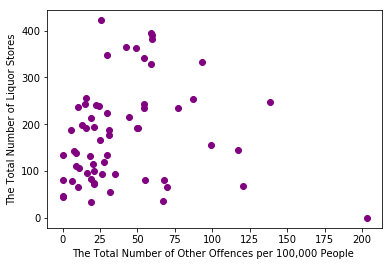

In [51]:
# Create the Scatter plot
plt.scatter(list_clean_other, list_clean_total_liquor_store, color='purple')
plt.xlabel("The Total Number of Other Offences per 100,000 People ")
plt.ylabel("The Total Number of Liquor Stores")

# Calculate the Pearson Correlation
clean_pearson_other_offences = pearson_correl(clean_other, clean_total_liquor_store_2015)
print("The Pearson Correlation is", clean_pearson_other_offences)

# Calculate the Mutual Information
clean_normalised_mutual_info_other = normalised_mutual_information(list_clean_other_liquor, 
                                                                   bins_clean_other, bins_clean_liquor)
print('The Normalised Mutual Information is', clean_normalised_mutual_info_other)

# Scatter Plot for Each Type of Crimes with Outliers

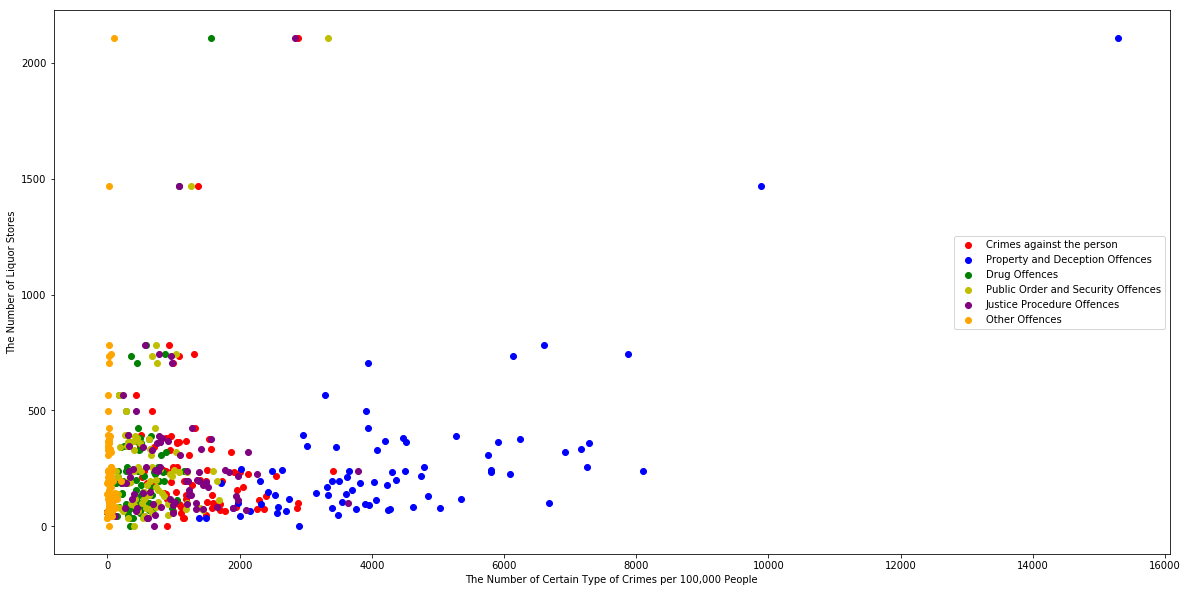

In [52]:
plt.figure(figsize=(20,10))
plt.scatter(list(dict_crime_against_person.values()),liquor_store_crime,color='r')
plt.scatter(list(dict_property_offences.values()),liquor_store_crime,color='b')
plt.scatter(list(dict_drug_offences.values()),liquor_store_crime,color='g')
plt.scatter(list(dict_security_offences.values()),liquor_store_crime,color='y')
plt.scatter(list(dict_justice_offences.values()),liquor_store_crime,color='purple')
plt.scatter(list(dict_other_offences.values()),liquor_store_crime,color='orange')
plt.legend(['Crimes against the person', 'Property and Deception Offences', 'Drug Offences', 
           'Public Order and Security Offences', 'Justice Procedure Offences', 'Other Offences'], loc='center right')
plt.xlabel("The Number of Certain Type of Crimes per 100,000 People")
plt.ylabel("The Number of Liquor Stores");

# Scatter Plot for Each Type of Crimes without Outliers

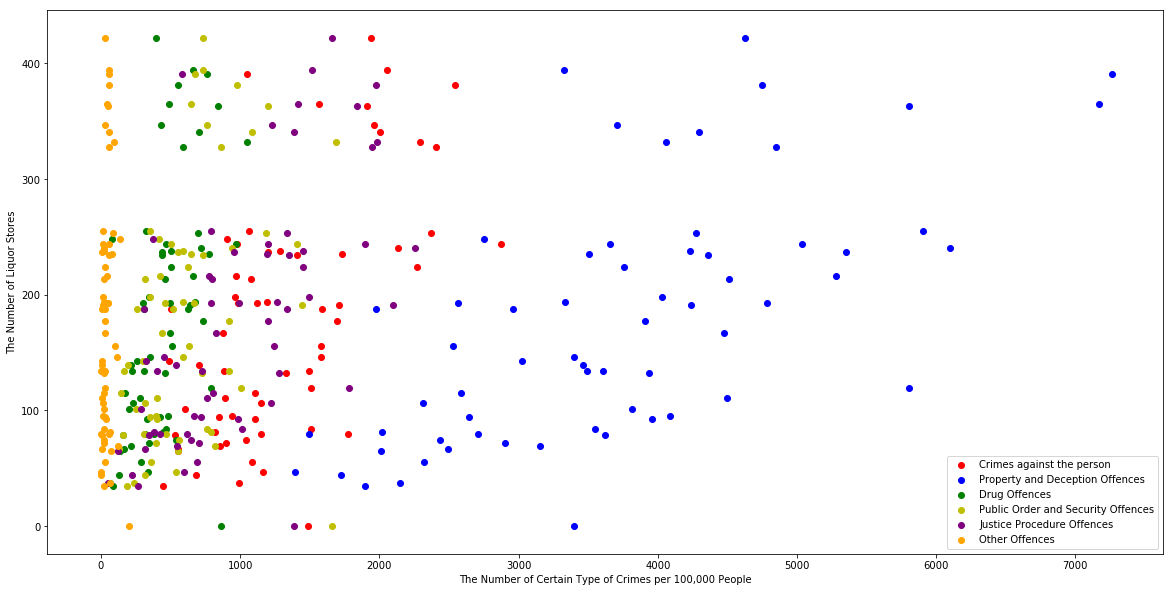

In [53]:
plt.figure(figsize=(20,10))
plt.scatter(list(clean_person.values()),list_clean_total_liquor_store,color='r')
plt.scatter(list(clean_property.values()),list_clean_total_liquor_store,color='b')
plt.scatter(list(clean_drug.values()),list_clean_total_liquor_store,color='g')
plt.scatter(list(clean_security.values()),list_clean_total_liquor_store,color='y')
plt.scatter(list(clean_justice.values()),list_clean_total_liquor_store,color='purple')
plt.scatter(list(clean_other.values()),list_clean_total_liquor_store,color='orange')
plt.legend(['Crimes against the person', 'Property and Deception Offences', 'Drug Offences', 
           'Public Order and Security Offences', 'Justice Procedure Offences', 'Other Offences'], loc='best')
plt.xlabel("The Number of Certain Type of Crimes per 100,000 People")
plt.ylabel("The Number of Liquor Stores");